### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-01-02 21:02:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.07s   

2021-01-02 21:02:31 (955 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUELTYPE** e.g. z
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets select some features that we want to use for regression.


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Lets plot Emission values with respect to Engine size:


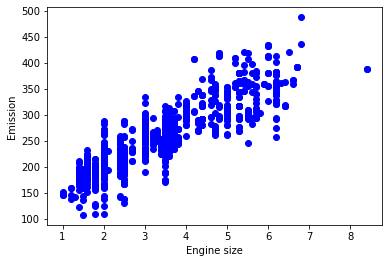

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset


In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

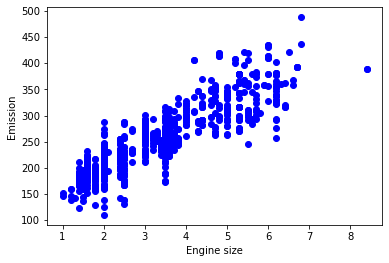

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.25248481  7.41417595  9.23096194]]


<h2 id="prediction">Prediction</h2>


In [22]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: {:.2f}".format(np.mean((y_hat - y) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 511.89
Variance score: 0.88


**explained variance regression score:**  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$  


Using a multiple linear regression with the same dataset but this time using __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. 


In [24]:
# write your code here
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.30456041  7.15509018  5.70628186  3.32329988]]


In [25]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: {:.2f}".format(np.mean((y_hat - y) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 511.92
Variance score: 0.88
